In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from empiricaldist import Pmf, Cdf
import scipy.stats as ss

In [3]:
hr_df = pd.read_csv(Path.cwd() / 'data' / 'HR-Employee-Attrition.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
pd.concat([hr_df.nunique(), hr_df.dtypes, hr_df.isna().sum()], axis=1).rename({0:'nunique', 1:'dtypes', 2:'isna'}, axis=1)

,nunique,dtypes,isna
Age,43,int64,0
Attrition,2,object,0
BusinessTravel,3,object,0
DailyRate,886,int64,0
Department,3,object,0
DistanceFromHome,29,int64,0
Education,5,int64,0
EducationField,6,object,0
EmployeeCount,1,int64,0
EmployeeNumber,1470,int64,0


ShapiroResult(statistic=0.9774479269981384, pvalue=2.0348782405724304e-14)

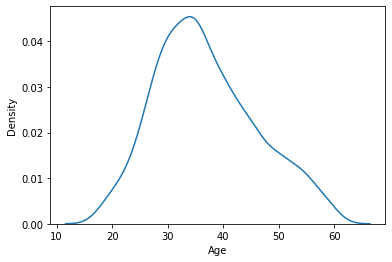

In [12]:
# Age
sns.kdeplot(hr_df['Age'])
ss.shapiro(hr_df['Age'])

In [15]:
# Attrition
hr_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
# BusinessTravel
hr_df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

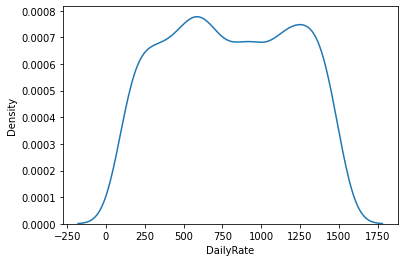

In [23]:
# DailyRate
sns.kdeplot(hr_df['DailyRate'])
hr_df['DailyRate'].describe()

In [27]:
# Department
hr_df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

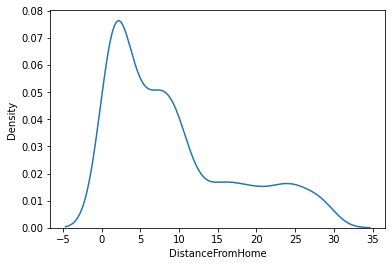

In [29]:
# DistanceFromHome
sns.kdeplot(hr_df['DistanceFromHome'])
hr_df['DistanceFromHome'].describe()

In [30]:
# Education → Category로 astype 필요
hr_df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [31]:
# EducationField
hr_df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [32]:
# EnvironmentSatisfaction → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
hr_df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [33]:
# Gender
hr_df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

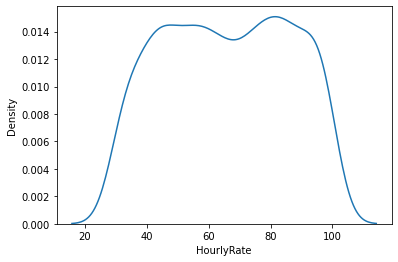

In [34]:
# HourlyRate
sns.kdeplot(hr_df['HourlyRate'])
hr_df['HourlyRate'].describe()

In [35]:
# DailyRate & HourlyRate
# DailyRate와 HourlyRate의 correlation이 이렇게 낮은게 말이 되나..?
# randomized된 자료 작성으로 보이므로, MonthlyRate까지 비교하여 불필요한 데이터 삭제 필요
hr_df['DailyRate'].corr(hr_df['HourlyRate'])

0.023381421528320293

In [36]:
# JobInvolvement → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
hr_df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [37]:
# JobLevel → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
hr_df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [38]:
# JobRole
hr_df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [46]:
# Department, JobRole, EducationField 비교
(hr_df[['Department', 'JobRole', 'EducationField']]
 .value_counts()
 .reset_index(name='Count')
 .sort_values(by=['Department', 'Count'], ascending=[True, False])
)

,Department,JobRole,EducationField,Count
19,Human Resources,Human Resources,Human Resources,21
29,Human Resources,Human Resources,Life Sciences,13
31,Human Resources,Human Resources,Medical,11
34,Human Resources,Manager,Human Resources,6
39,Human Resources,Human Resources,Technical Degree,4
40,Human Resources,Manager,Life Sciences,3
42,Human Resources,Human Resources,Other,3
44,Human Resources,Manager,Medical,2
0,Research & Development,Research Scientist,Life Sciences,133
2,Research & Development,Laboratory Technician,Life Sciences,119
